In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [89]:
df = pd.read_csv("CC_DATASET.csv")

In [90]:
df = df.fillna(0)

In [91]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [92]:
sc = StandardScaler()
df_numeric = df.drop(["CUST_ID"], axis=1)
sc.fit(df_numeric)
df = pd.DataFrame(sc.transform(df_numeric), columns = df_numeric.columns)

In [93]:
k = 2
km_model = KMeans(n_clusters = k)
km_model.fit(X = df)
df["CLUSTER_K2"] = pd.DataFrame(km_model.labels_).values

In [94]:
k = 3
km_model = KMeans(n_clusters = k)
km_model.fit(X = df)
df["CLUSTER_K3"] = pd.DataFrame(km_model.labels_).values

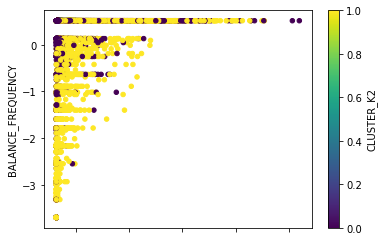

In [95]:
df.plot.scatter(x='BALANCE', y='BALANCE_FREQUENCY', c='CLUSTER_K2', colormap='viridis', s=20)
plt.show()

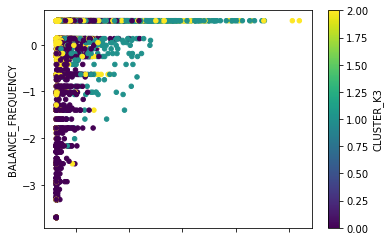

In [96]:
df.plot.scatter(x='BALANCE', y='BALANCE_FREQUENCY', c='CLUSTER_K3', colormap='viridis', s=20)
plt.show()

In [97]:
df = pd.read_csv("DIAG_CANCER.csv")

In [98]:
upper_quantile = df['radius_mean'].quantile(0.9)
filter_matrix = df['radius_mean'] < upper_quantile
target_mean = df[filter_matrix]['radius_mean'].median()
df.loc[np.invert(filter_matrix), 'radius_mean'] = target_mean

In [99]:
df = df.drop('Unnamed: 32', axis=1)

In [100]:
sc = StandardScaler()
df_numeric = df.drop(['id', 'diagnosis'], axis=1)
sc.fit(df_numeric)
df = pd.DataFrame(sc.transform(df_numeric), columns = df_numeric.columns)

In [101]:
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.868810,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.129176,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,-0.129176,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.767087,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-0.129176,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.129176,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,-0.129176,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,1.311140,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,-0.129176,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [103]:
pca = PCA(n_components = 5)
pca.fit(df)
X_pca = pca.transform(df)
pca.components_

array([[ 1.38952903e-01,  1.04784881e-01,  2.25713744e-01,
         2.17967801e-01,  1.48271773e-01,  2.46084063e-01,
         2.62853072e-01,  2.63269065e-01,  1.44087025e-01,
         7.24584062e-02,  2.05685136e-01,  1.89200748e-02,
         2.11481437e-01,  2.01100872e-01,  1.73775759e-02,
         1.77691571e-01,  1.59595935e-01,  1.88906870e-01,
         4.58658885e-02,  1.09438778e-01,  2.26493571e-01,
         1.06276279e-01,  2.35691828e-01,  2.22614519e-01,
         1.33974067e-01,  2.17378095e-01,  2.34906090e-01,
         2.54969289e-01,  1.28740667e-01,  1.40313126e-01],
       [-1.92506078e-01, -6.84294795e-02, -2.28293779e-01,
        -2.41124825e-01,  1.82170847e-01,  1.40608294e-01,
         4.94115433e-02, -4.67623690e-02,  1.86046094e-01,
         3.70053609e-01, -1.11476436e-01,  9.46082547e-02,
        -9.56361044e-02, -1.57570443e-01,  2.14048564e-01,
         2.27671887e-01,  1.93749542e-01,  1.23400593e-01,
         1.89518480e-01,  2.81013418e-01, -2.34284564e-

In [105]:
new_df = pd.DataFrame(X_pca)